## Mapping  
SHP load, Geopandas with Matplotlib, Cartopy, map save, etc.

In [1]:
# Installing packages and importing

%pip install geopandas
import geopandas
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 12


     |████████████████████████████████| 1.0 MB 14.7 MB/s 
     |████████████████████████████████| 16.7 MB 53.2 MB/s 
     |████████████████████████████████| 6.3 MB 52.1 MB/s 


<Figure size 432x288 with 0 Axes>

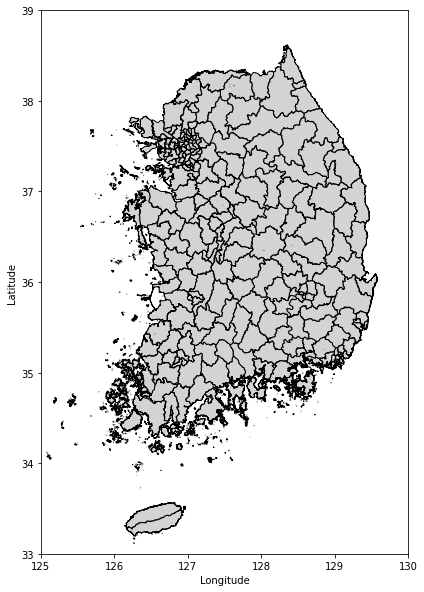

In [2]:
# Plotting map: Korea

# map file: .shp


df1 = geopandas.read_file('TL_SCCO_SIG.shp', encoding='euc-kr')
df1 = df1.to_crs(epsg=4326)


lon1, lon2, lat1, lat2 = 125.0, 130.0, 33.0, 39.0
extent = [lon1, lon2, lat1, lat2]

plt.figure()
ax = df1.plot(figsize=(10, 10), edgecolor='k', facecolor='lightgray')
ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('test.png') # Map saving
plt.show()
plt.close()


In [3]:
# Checking df1
df1

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.58509 38.08062, 127.58566 38.080..."
1,42130,Wonju-si,원주시,"POLYGON ((127.93580 37.50246, 127.93618 37.502..."
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((129.04785 37.64961, 129.04788 ..."
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((129.08794 37.59500, 129.08789 ..."
4,42190,Taebaek-si,태백시,"POLYGON ((129.01252 37.33636, 129.01245 37.336..."
...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((127.53733 36.80859, 127.53797 36.808..."
246,43750,Jincheon-gun,진천군,"POLYGON ((127.44138 37.01190, 127.44193 37.011..."
247,43760,Goesan-gun,괴산군,"POLYGON ((127.80067 36.94755, 127.80079 36.947..."
248,43770,Eumseong-gun,음성군,"POLYGON ((127.62988 37.15424, 127.62987 37.154..."


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<Figure size 432x288 with 0 Axes>

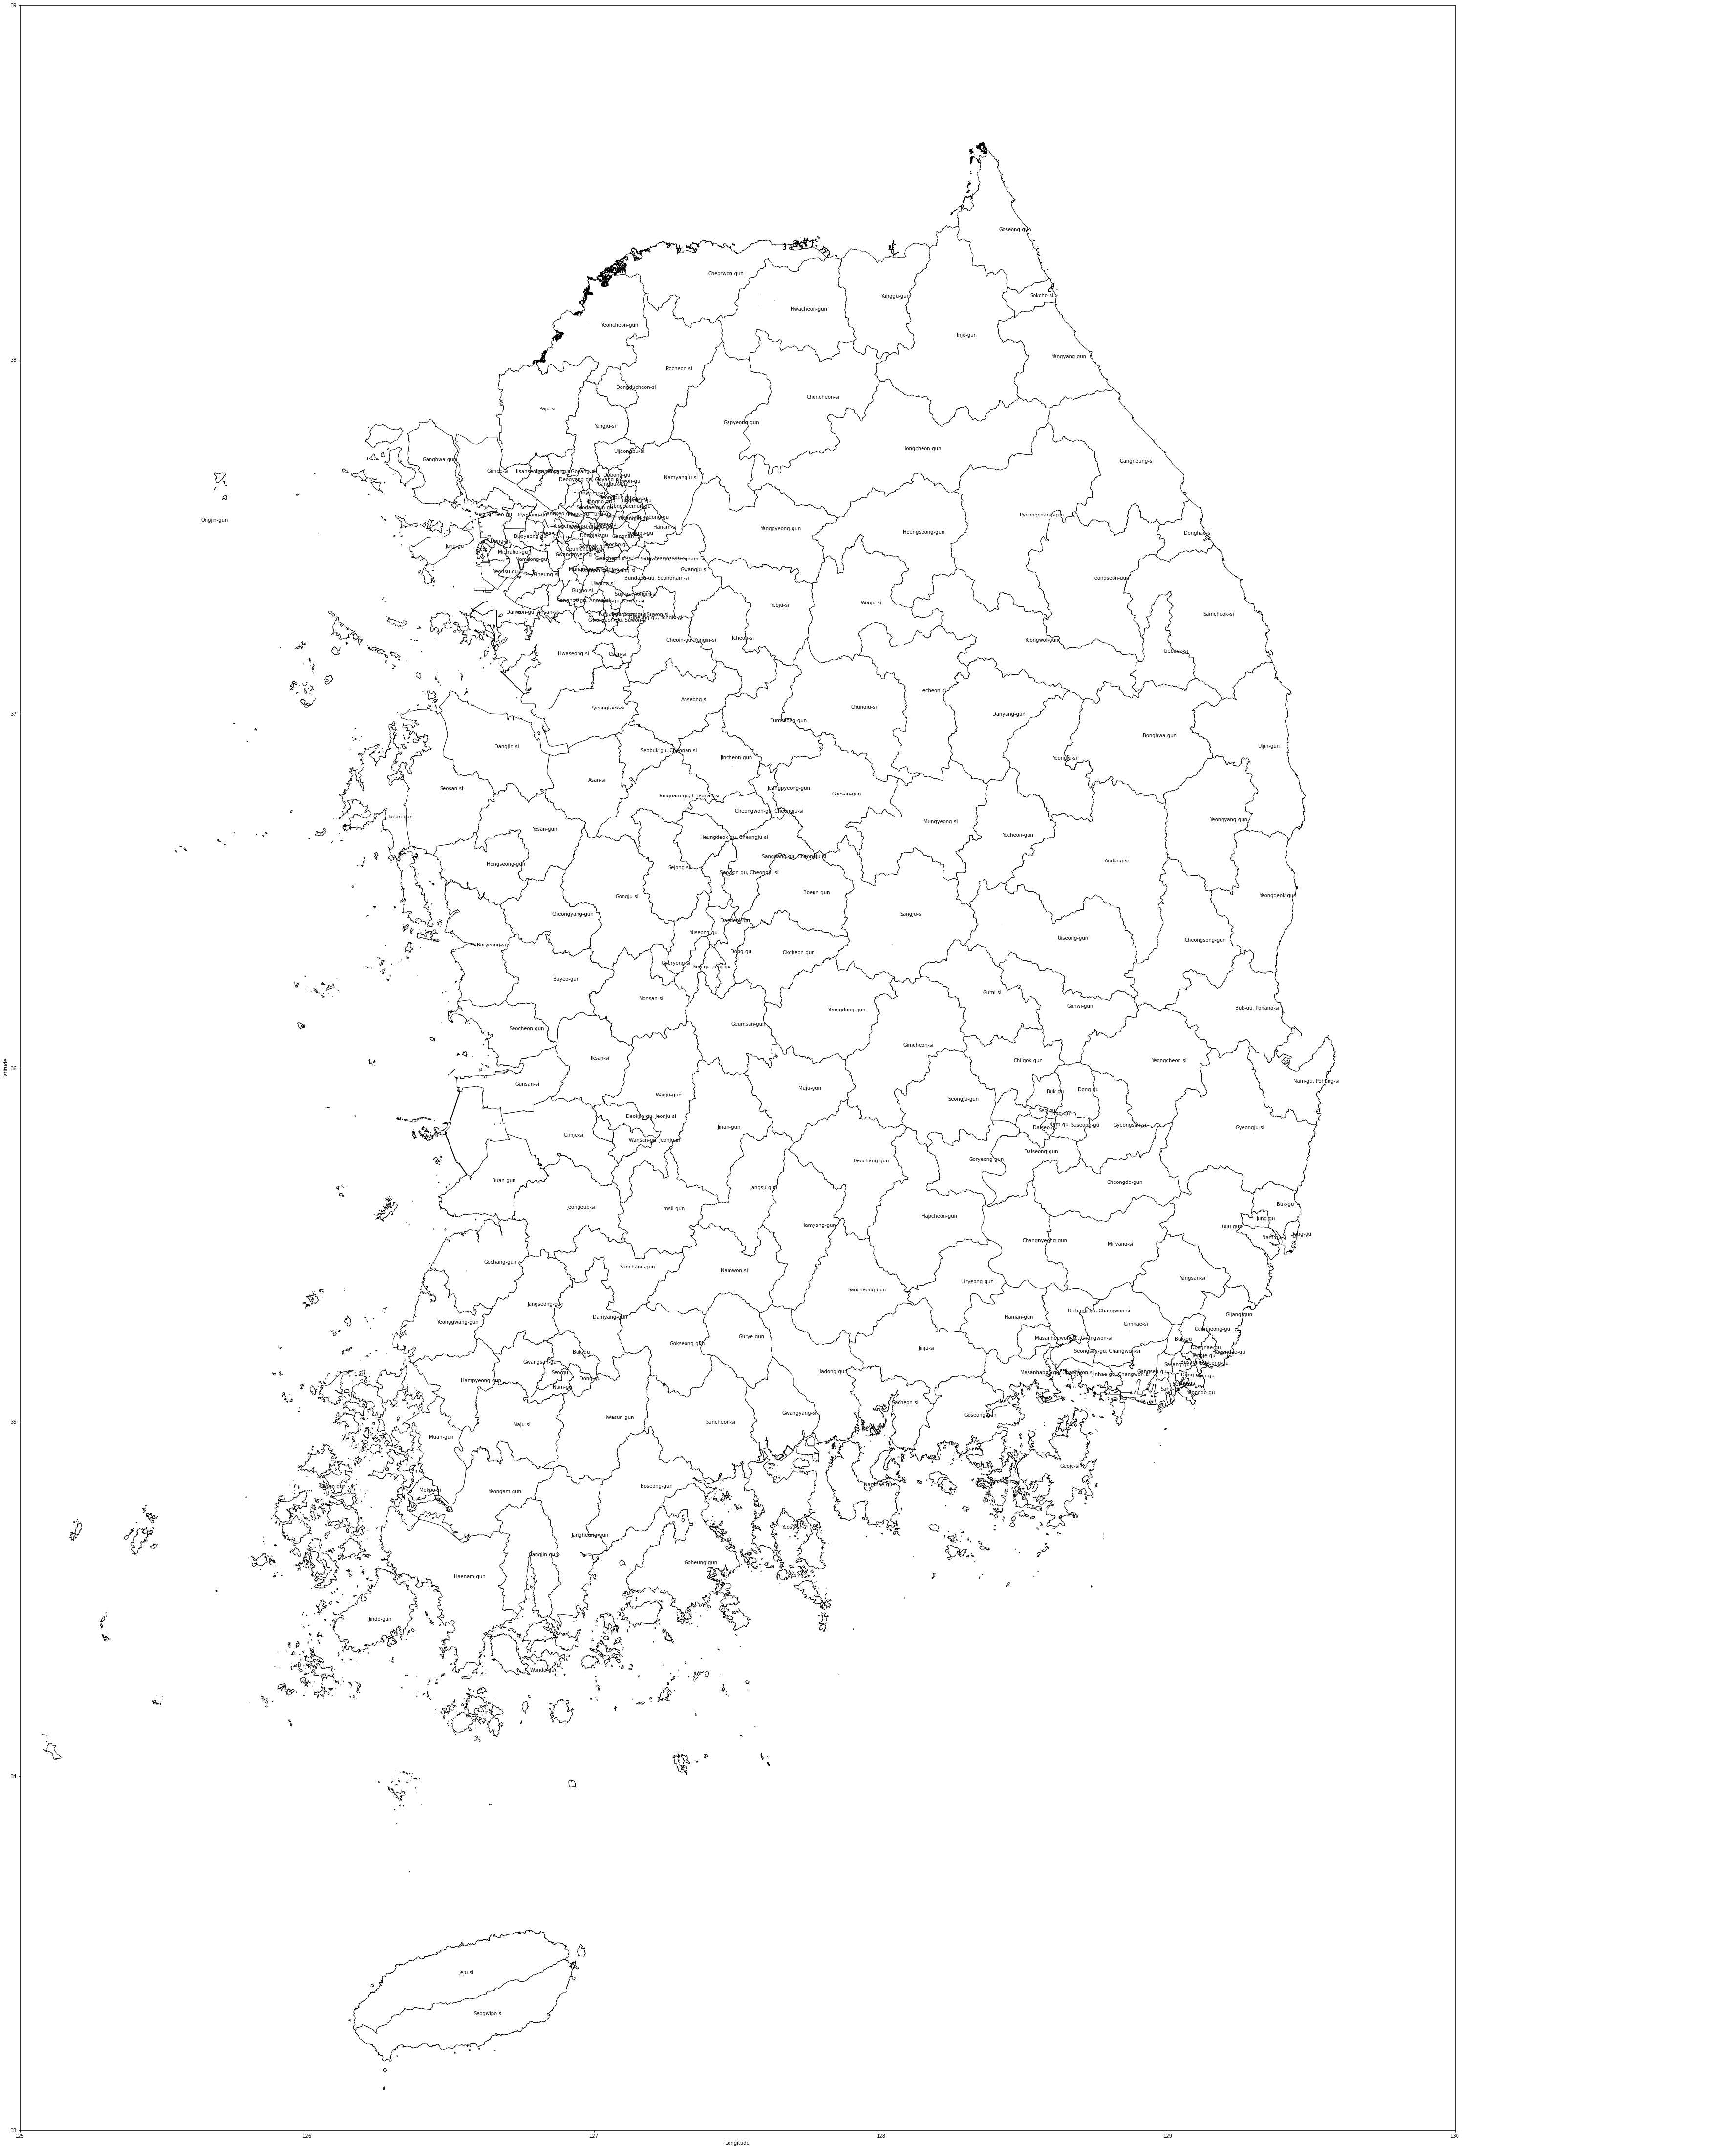

In [4]:
# Adding labels

lon1, lon2, lat1, lat2 = 125.0, 130.0, 33.0, 39.0
extent = [lon1, lon2, lat1, lat2]


df1["x"] = df1.geometry.centroid.map(lambda p: p.x)
df1["y"] = df1.geometry.centroid.map(lambda p: p.y)


plt.figure()
ax = df1.plot(figsize=(80, 80), edgecolor='k', facecolor='white')

for idx, row in df1.iterrows():
    plt.annotate(s=row['SIG_ENG_NM'], xy=(df1.x[idx], df1.y[idx]))

ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('test.png')
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

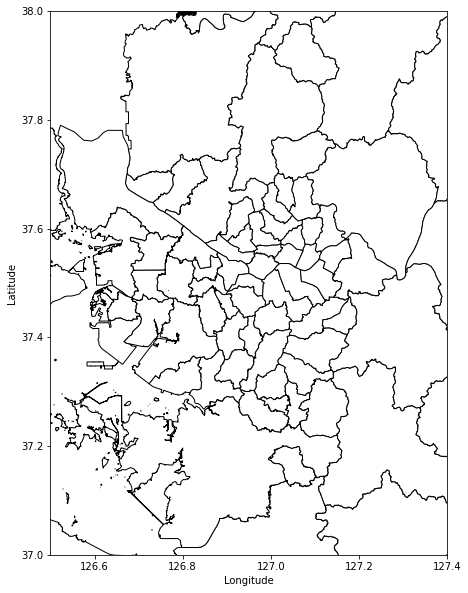

In [5]:
# Plotting map: Seoul


lon1, lon2, lat1, lat2 = 126.5, 127.4, 37.0, 38.0
extent = [lon1, lon2, lat1, lat2]

plt.figure()
ax = df1.plot(figsize=(10, 10), edgecolor='k', facecolor='white')
ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('test.png')
plt.show()
plt.close()


In [6]:
# Point data plotting on the map

df = pd.read_csv('3_AirKorea_NearSeoul.csv')
df

,date,Station code,SO2,CO,O3,NO2,PM10,PM25,lat,lon
0,2021-01-01,111121,0.003,0.5,0.018,0.021,29.0,16.0,37.564263,126.974676
1,2021-01-01,111122,0.003,0.4,0.021,0.024,25.0,11.0,37.549065,126.970466
2,2021-01-01,111123,0.003,0.5,0.024,0.015,26.0,14.0,37.572016,127.005008
3,2021-01-01,111124,0.003,0.4,0.023,0.015,22.0,15.0,37.568602,126.998168
4,2021-01-01,111125,0.003,0.4,0.024,0.013,22.0,11.0,37.570877,126.996538
5,2021-01-01,111131,0.003,0.4,0.017,0.017,36.0,11.0,37.540033,127.004850
6,2021-01-01,111141,0.002,0.5,0.018,0.015,27.0,13.0,37.547180,127.092493
7,2021-01-01,111142,0.003,0.4,0.029,0.020,21.0,14.0,37.541864,127.049659
8,2021-01-01,111143,0.003,0.8,0.026,0.012,22.0,17.0,37.538691,127.042044
9,2021-01-01,111151,0.004,0.5,0.020,0.022,21.0,11.0,37.584848,127.094023


<Figure size 432x288 with 0 Axes>

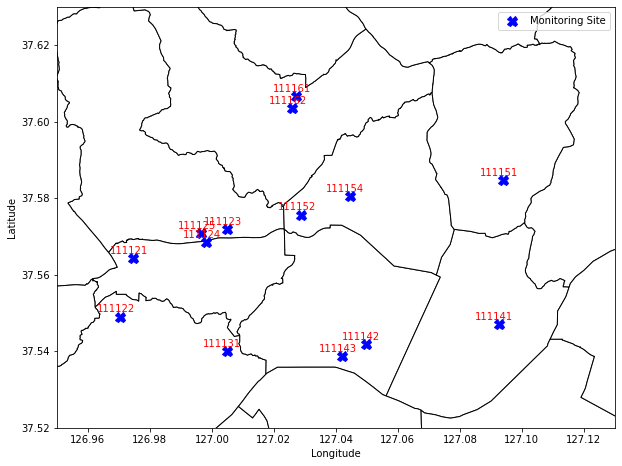

In [7]:
# Mapping points on the map with text

lon1, lon2, lat1, lat2 = 126.95, 127.13, 37.52, 37.63
extent = [lon1, lon2, lat1, lat2]

plt.figure()
ax = df1.plot(figsize=(10, 10), edgecolor='k', facecolor='white')
ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)

plt.plot(df['lon'], df['lat'], color='blue', marker='X',
         linestyle='None', markersize=10, label='Monitoring Site')

for i in range(df.shape[0]):
    plt.text(df['lon'][i]*0.99994, df['lat'][i]*1.00003, df['Station code'][i],
             color='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.savefig('test.png')
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

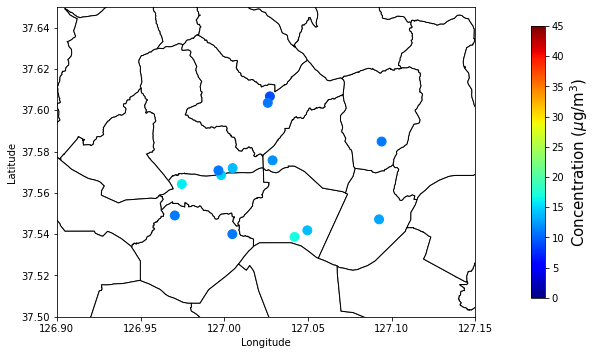

In [9]:
# Point data plotting on the map with values


lon1, lon2, lat1, lat2 = 126.9, 127.15, 37.5, 37.65
extent = [lon1, lon2, lat1, lat2]

plt.figure()
ax = df1.plot(figsize=(10, 10), edgecolor='k', facecolor='white')
ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)

points = plt.scatter(df['lon'], df['lat'], c=df["PM25"],
                      vmin=0, vmax=45,
                      cmap='jet', s=80)
cb = plt.colorbar(points, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)

cb.set_label(label='Concentration (' + "${\mu}$" + 'g/m' + r'$^3$' + ')', size=15)


plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('test.png')
plt.show()
plt.close()


<Figure size 432x288 with 0 Axes>

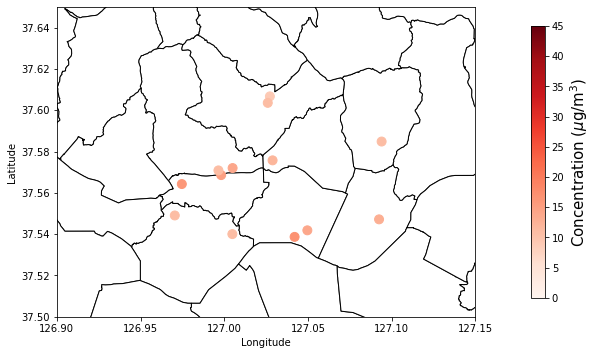

In [10]:
# Using other cmap

# Point data plotting on the map with values


lon1, lon2, lat1, lat2 = 126.9, 127.15, 37.5, 37.65
extent = [lon1, lon2, lat1, lat2]

plt.figure()
ax = df1.plot(figsize=(10, 10), edgecolor='k', facecolor='white')
ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)

points = plt.scatter(df['lon'], df['lat'], c=df["PM25"],
                      vmin=0, vmax=45,
                      cmap='Reds', s=80)

# cmaps : https://matplotlib.org/stable/tutorials/colors/colormaps.html

cb = plt.colorbar(points, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)

cb.set_label(label='Concentration (' + "${\mu}$" + 'g/m' + r'$^3$' + ')', size=15)


plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('test.png')
plt.show()
plt.close()